# Microbes Identification

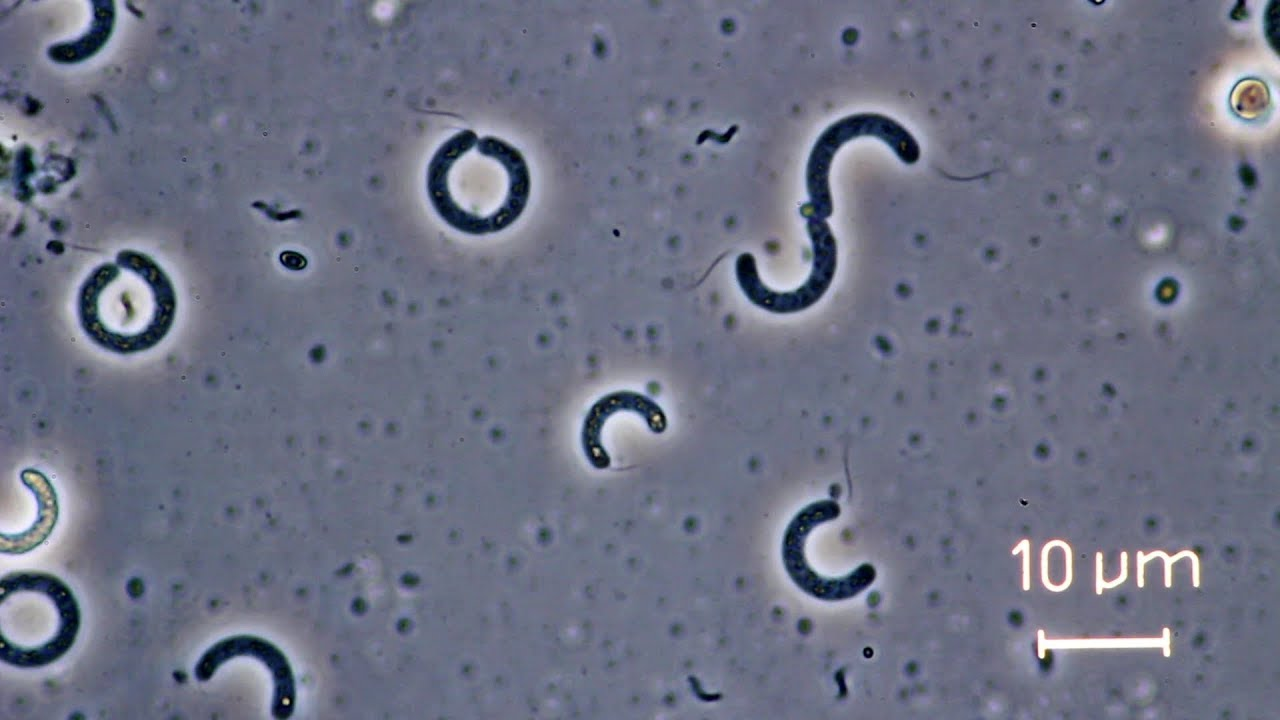

## 📖 Background

Novel DNA sequencing technologies have proliferated over the past two decades. Continual improvements in “next-generation sequencing” (NGS) and “third-generation sequencing” (TGS) have increased the fidelity and rate of sequencing, but it still takes hours or days to obtain complete sequences. Furthermore, there are some diagnostic applications in which very rapid identification of a particular gene or genetic species becomes essential, while identification of all genes is not necessary.

For example, in patients with septic shock from bacterial infections, identification of antibiotic-resistance genes is essential because the mortality rate increases 7.6% per hour of delay in administering correct antibiotics. Unfortunately, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections.

Bacterial antibiotic resistance is becoming a significant health threat, and rapid identification of antibiotic-resistant bacteria is essential to save lives and reduce the spread of antibiotic resistance.


## 🔎 Objective

* `Identify the ten different micro-forms of life`

## 💾 Data Summary

* `Solidity` : It is the ratio of area of an object to the area of a convex hull of the object. Computed as Area/ConvexArea.
* `Eccentricity` : The eccentricity is the ratio of length of major to minor axis of an object.
* `EquivDiameter` : Diameter of a circle with the same area as the region.
* `Extrema` : Extrema points in the region. The format of the vector is [top-left top-right right-top right-bottom bottom-right

* `FilledArea` : Number of on pixels in FilledImage, returned as a scalar.
* `Extent` : Ratio of the pixel area of a region with respect to the bounding box area of an object.
* `Orientation` : The overall direction of the shape. The value ranges from -90 degrees to 90 degrees.
* `EulerNumber` : Number of objects in the region minus the number of holes in those objects.
* `BoundingBox` : Position and size of the smallest box (rectangle) which bounds the object.
* `ConvexHull1` : 
* `MajorAxisLength`
* `MinorAxisLength`
* `Perimeter`
* `ConvexArea`
* `Centroid`
* `Area`
* `raddi`
* `microorganisms` : [Spirogyra, Volvox, Pithophora, Yeast, Raizopus, Penicillum, Aspergillus sp, Protozoa, Diatom, Ulothrix] 


## 🛬 Approach 

* *`Supervised Learning`*
* *`Classification`*
* *`Multi-class Classification`*

## Packages Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree, export_text
import treeplot as tree
import warnings
warnings.filterwarnings("ignore")

# Model Evaluation
def model_scores(model, X_train,y_train, X_val, y_val, train=True):
    if train == True:
        print('========== Train Classification Report ============')
        print(classification_report(y_train, model.predict(X_train)))
        
        print('\n Accuracy Score : ',accuracy_score(y_train, model.predict(X_train)))
    else:
        print('========== Validation Classification Report ============')
        print(classification_report(y_val, model.predict(X_val)))
        print('\n Accuracy Score : ',accuracy_score(y_val, model.predict(X_val)))

## Data Import 

In [2]:
raw_df = pd.read_csv('microbes.csv',index_col=0)

In [3]:
raw_df

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


## Exploratory Data Analysis

### Are there any null values in dataset

In [4]:
raw_df.isna().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

### Data type of columns

In [5]:
raw_df.dtypes

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

### Rows and Columns in dataset

In [6]:
raw_df.shape

(30527, 25)

### Descriptive Statics

In [7]:
raw_df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


### Distribution plots

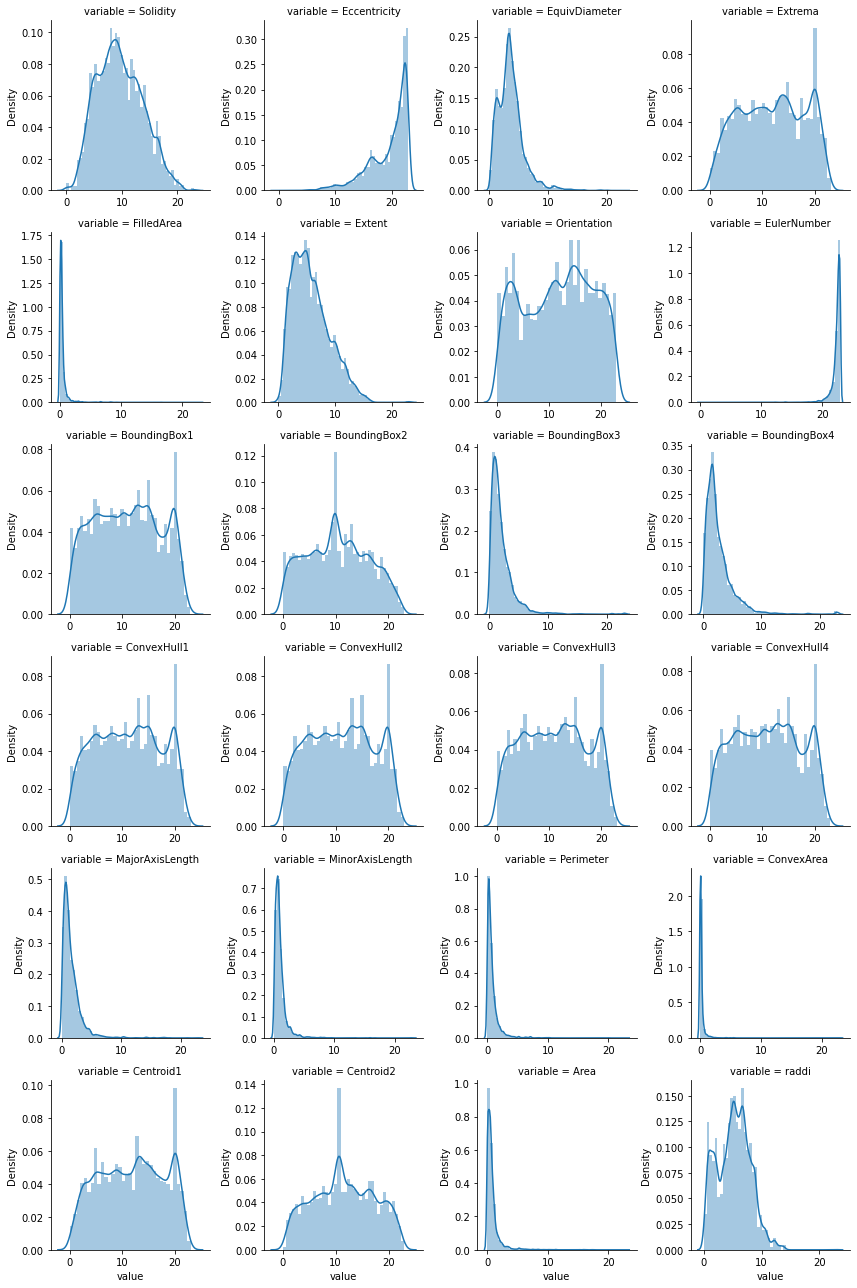

In [8]:
nd = pd.melt(raw_df.iloc[:,:-1])
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1;

* All Columns data is distributed in the range of 0-20

### Boxplot 

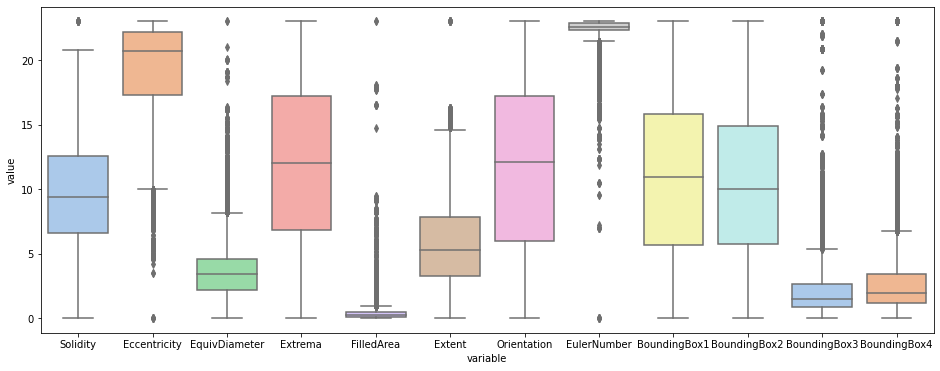

In [9]:
plt.figure(figsize=(16,6))
sns.boxplot(x="variable",y="value",data=pd.melt(raw_df.iloc[:,:12]),palette="pastel");

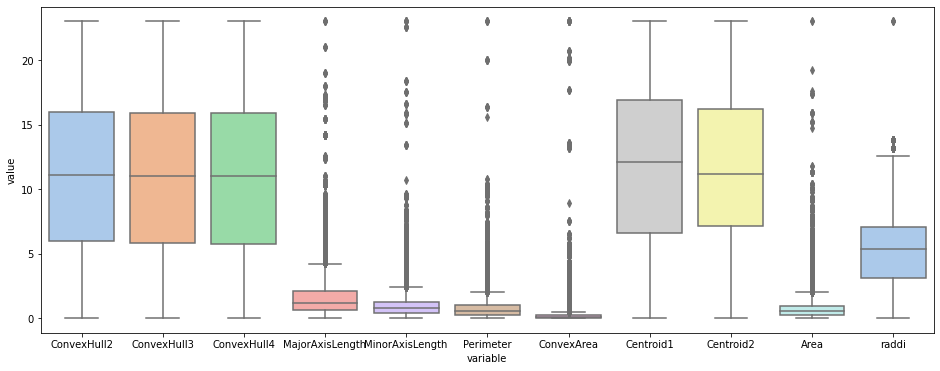

In [10]:
plt.figure(figsize=(16,6))
sns.boxplot(x="variable",y="value",data=pd.melt(raw_df.iloc[:,13:-1]),palette="pastel");

* Many columns containing outliers

### Target Values Count

In [11]:
target_count = raw_df['microorganisms'].value_counts()

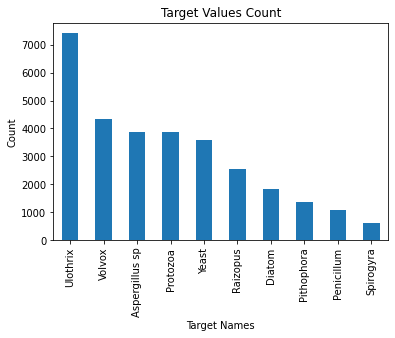

In [12]:
target_count.plot(kind='bar')
plt.xlabel('Target Names')
plt.ylabel('Count')
plt.title('Target Values Count');

 Dataset is not balanced

## Correlation

Text(0.5, 1.0, 'Correlation Matrix')

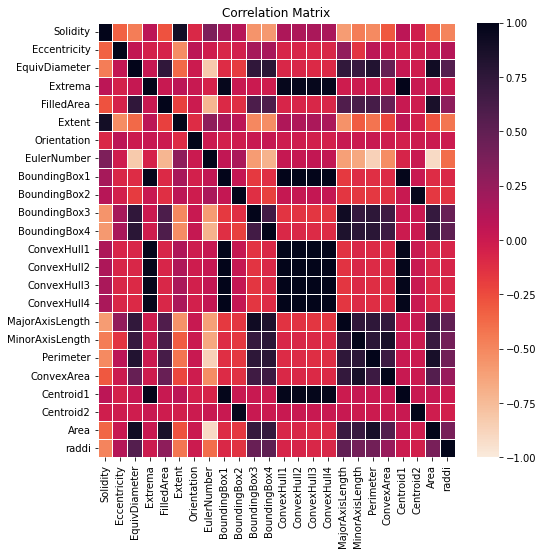

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(raw_df.corr(),vmin=-1, vmax=1, cmap=sns.color_palette("rocket_r", as_cmap=True),fmt='.2g',linewidths=.5)
plt.title('Correlation Matrix')

## Data Preprocessing

In [14]:
# Input and Target cols
input_cols = raw_df.columns[:-1]
target_col  = raw_df.columns[-1]

In [15]:
# Input and Target dataframe
X = raw_df[input_cols]
y = raw_df[target_col]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=93,test_size = 0.15)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=93,test_size = 0.10)

In [17]:
print('Train size : ', X_train.shape[0])
print('Validation size : ', X_val.shape[0])
print('Test size : ', X_test.shape[0])

Train size :  23352
Validation size :  4580
Test size :  2595


In [18]:
# Normalization
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## ML Modelling

## Logistic Regression

In [20]:
lr = LogisticRegression(random_state=93,max_iter=1000,n_jobs=-1)

In [21]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=93)

### Model Evaluation

In [22]:
model_scores(lr, X_train_scaled,y_train, X_val_scaled, y_val, train=True)

========== Train Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       0.40      0.42      0.41      2969
        Diatom       0.41      0.24      0.30      1392
    Penicillum       0.07      0.01      0.01       827
    Pithophora       0.66      0.54      0.59      1056
      Protozoa       0.48      0.43      0.45      2977
      Raizopus       0.62      0.74      0.68      1944
     Spirogyra       0.13      0.01      0.01       468
      Ulothrix       0.46      0.64      0.53      5674
        Volvox       0.50      0.49      0.50      3309
         Yeast       0.55      0.46      0.50      2736

      accuracy                           0.49     23352
     macro avg       0.43      0.40      0.40     23352
  weighted avg       0.47      0.49      0.47     23352


 Accuracy Score :  0.48766700924974304


In [23]:
model_scores(lr, X_train_scaled,y_train, X_val_scaled, y_val, train=False)

========== Validation Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       0.40      0.42      0.41       591
        Diatom       0.46      0.25      0.32       281
    Penicillum       0.07      0.01      0.01       161
    Pithophora       0.57      0.55      0.56       169
      Protozoa       0.45      0.43      0.44       551
      Raizopus       0.61      0.74      0.67       391
     Spirogyra       0.00      0.00      0.00        96
      Ulothrix       0.46      0.63      0.53      1113
        Volvox       0.54      0.51      0.52       671
         Yeast       0.59      0.48      0.53       556

      accuracy                           0.49      4580
     macro avg       0.41      0.40      0.40      4580
  weighted avg       0.47      0.49      0.47      4580


 Accuracy Score :  0.49148471615720524


Model is `underfitting` Data

## Naive Bayes

In [24]:
gnb = GaussianNB()

In [25]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

### Model Evaluation

In [26]:
model_scores(gnb, X_train_scaled,y_train, X_val_scaled, y_val, train=True)

========== Train Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       1.00      0.00      0.01      2969
        Diatom       0.29      0.06      0.10      1392
    Penicillum       0.09      0.75      0.16       827
    Pithophora       0.21      0.25      0.23      1056
      Protozoa       0.16      0.42      0.23      2977
      Raizopus       0.53      0.48      0.50      1944
     Spirogyra       0.41      0.07      0.12       468
      Ulothrix       0.75      0.06      0.12      5674
        Volvox       0.35      0.17      0.23      3309
         Yeast       0.25      0.28      0.26      2736

      accuracy                           0.21     23352
     macro avg       0.40      0.26      0.20     23352
  weighted avg       0.49      0.21      0.19     23352


 Accuracy Score :  0.20974648852346695


In [27]:
model_scores(gnb, X_train_scaled,y_train, X_val_scaled, y_val, train=False)

========== Validation Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       1.00      0.00      0.00       591
        Diatom       0.22      0.05      0.09       281
    Penicillum       0.08      0.73      0.15       161
    Pithophora       0.17      0.22      0.19       169
      Protozoa       0.17      0.46      0.24       551
      Raizopus       0.52      0.50      0.51       391
     Spirogyra       0.38      0.03      0.06        96
      Ulothrix       0.73      0.07      0.13      1113
        Volvox       0.33      0.15      0.21       671
         Yeast       0.23      0.24      0.24       556

      accuracy                           0.20      4580
     macro avg       0.38      0.25      0.18      4580
  weighted avg       0.48      0.20      0.18      4580


 Accuracy Score :  0.20458515283842796


`Model is Underfitting Data`

## Decision Tree Classifier

In [28]:
dtc = DecisionTreeClassifier(random_state=93)

In [29]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=93)

### Decision Tree Evaluation

In [30]:
model_scores(dtc, X_train,y_train, X_val, y_val, train=True)

========== Train Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       1.00      1.00      1.00      2969
        Diatom       1.00      1.00      1.00      1392
    Penicillum       1.00      1.00      1.00       827
    Pithophora       1.00      1.00      1.00      1056
      Protozoa       1.00      1.00      1.00      2977
      Raizopus       1.00      1.00      1.00      1944
     Spirogyra       1.00      1.00      1.00       468
      Ulothrix       1.00      1.00      1.00      5674
        Volvox       1.00      1.00      1.00      3309
         Yeast       1.00      1.00      1.00      2736

      accuracy                           1.00     23352
     macro avg       1.00      1.00      1.00     23352
  weighted avg       1.00      1.00      1.00     23352


 Accuracy Score :  1.0


In [31]:
model_scores(dtc, X_train,y_train, X_val, y_val, train=False)

========== Validation Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       0.98      0.97      0.98       591
        Diatom       0.98      1.00      0.99       281
    Penicillum       0.99      1.00      1.00       161
    Pithophora       0.92      0.97      0.95       169
      Protozoa       0.99      1.00      1.00       551
      Raizopus       1.00      1.00      1.00       391
     Spirogyra       0.95      0.75      0.84        96
      Ulothrix       0.99      0.99      0.99      1113
        Volvox       1.00      1.00      1.00       671
         Yeast       0.98      1.00      0.99       556

      accuracy                           0.99      4580
     macro avg       0.98      0.97      0.97      4580
  weighted avg       0.99      0.99      0.99      4580


 Accuracy Score :  0.9866812227074235


*Decision Tree is Little Overfitting  the Data*

### Hyper Parameter Tunning Decision Tree

In [32]:
dtc1 = DecisionTreeClassifier(random_state=93,max_depth=26)
dtc1.fit(X_train,y_train,)
model_scores(dtc1, X_train,y_train, X_val, y_val, train=True)
model_scores(dtc1, X_train,y_train, X_val, y_val, train=False)

========== Train Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       1.00      1.00      1.00      2969
        Diatom       1.00      1.00      1.00      1392
    Penicillum       1.00      1.00      1.00       827
    Pithophora       1.00      1.00      1.00      1056
      Protozoa       1.00      1.00      1.00      2977
      Raizopus       1.00      1.00      1.00      1944
     Spirogyra       1.00      1.00      1.00       468
      Ulothrix       1.00      1.00      1.00      5674
        Volvox       1.00      1.00      1.00      3309
         Yeast       1.00      1.00      1.00      2736

      accuracy                           1.00     23352
     macro avg       1.00      1.00      1.00     23352
  weighted avg       1.00      1.00      1.00     23352


 Accuracy Score :  0.999914354230901
========== Validation Classification Report ============
                precision    recall  f1-score   support

Aspergill

### Decision Tree visualization

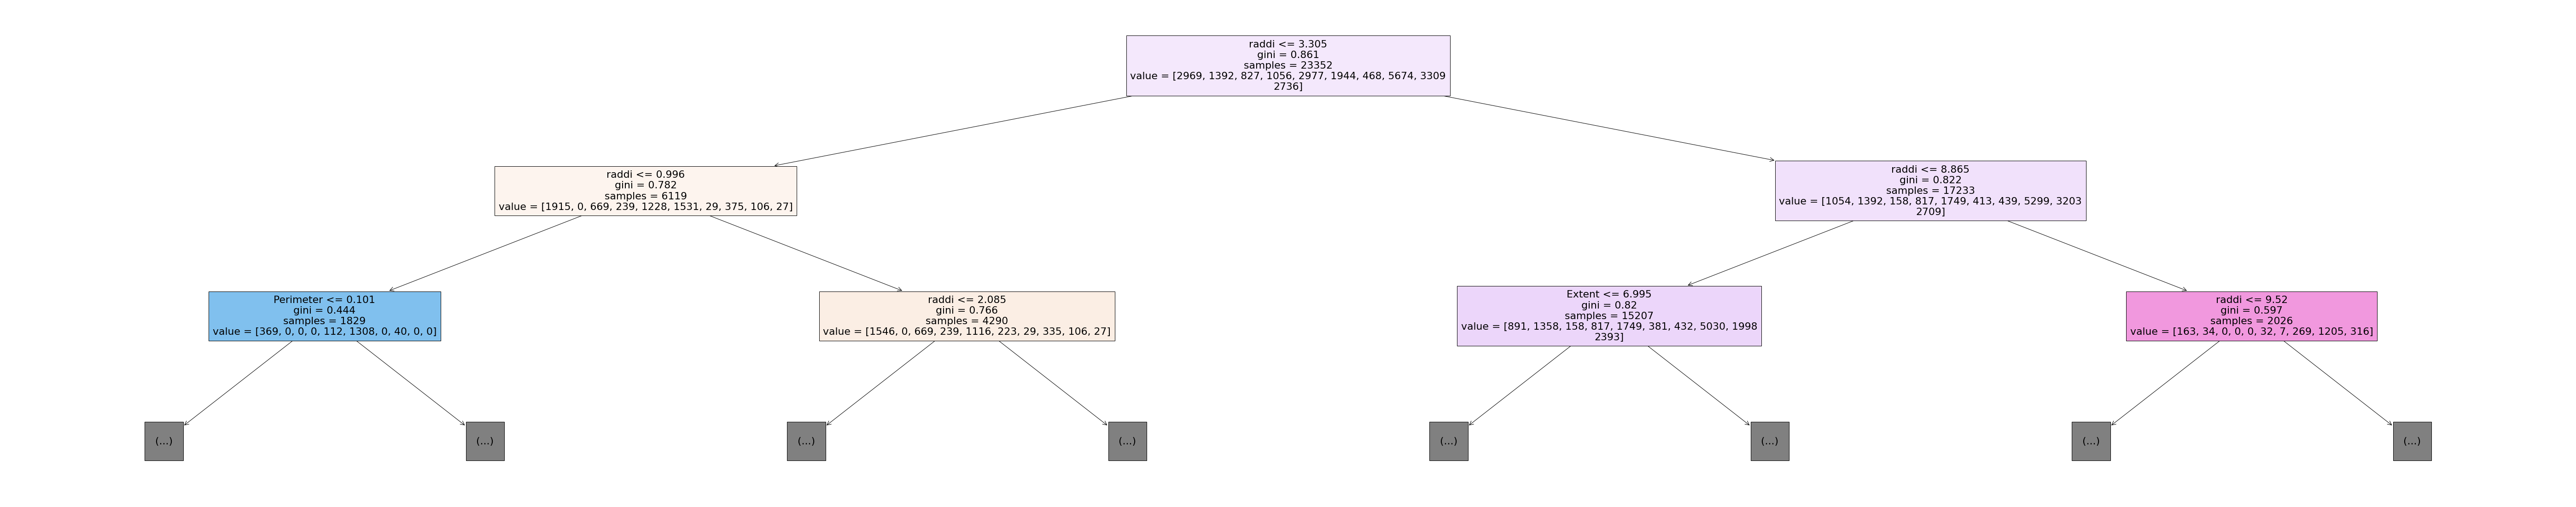

In [33]:
plt.figure(figsize=(100,20))
plot_tree(dtc1, feature_names=X_train.columns, max_depth=2, filled=True);

In [34]:
tree_text = export_text(dtc1, max_depth=26, feature_names=list(X_train.columns))
print(tree_text)

|--- raddi <= 3.30
|   |--- raddi <= 1.00
|   |   |--- Perimeter <= 0.10
|   |   |   |--- ConvexHull4 <= 2.86
|   |   |   |   |--- class: Aspergillus sp
|   |   |   |--- ConvexHull4 >  2.86
|   |   |   |   |--- Orientation <= 2.55
|   |   |   |   |   |--- ConvexHull3 <= 6.24
|   |   |   |   |   |   |--- class: Protozoa
|   |   |   |   |   |--- ConvexHull3 >  6.24
|   |   |   |   |   |   |--- Centroid1 <= 12.65
|   |   |   |   |   |   |   |--- class: Raizopus
|   |   |   |   |   |   |--- Centroid1 >  12.65
|   |   |   |   |   |   |   |--- MinorAxisLength <= 0.08
|   |   |   |   |   |   |   |   |--- class: Raizopus
|   |   |   |   |   |   |   |--- MinorAxisLength >  0.08
|   |   |   |   |   |   |   |   |--- Eccentricity <= 11.85
|   |   |   |   |   |   |   |   |   |--- Area <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: Protozoa
|   |   |   |   |   |   |   |   |   |--- Area >  0.05
|   |   |   |   |   |   |   |   |   |   |--- class: Aspergillus sp
|   |   |   |   |   |   |  

### Feature Importance

In [35]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtc1.feature_importances_
}).sort_values('importance', ascending=False)

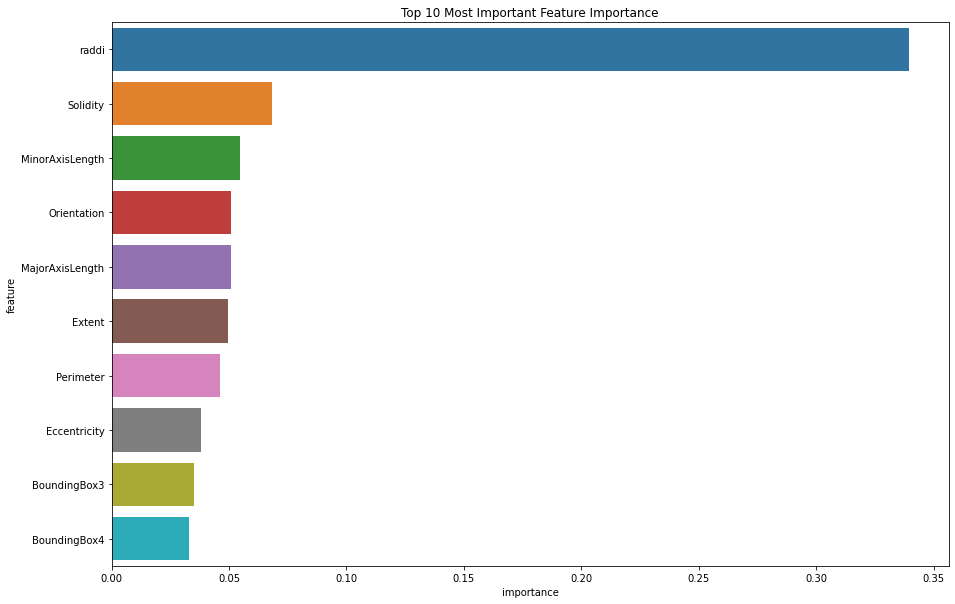

In [36]:
plt.figure(figsize=(15,10))
plt.title('Top 10 Most Important Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(random_state=0,max_depth=20)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

### Random Forest Classifier Evaluation

In [39]:
model_scores(rfc, X_train,y_train, X_val, y_val, train=True)

========== Train Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       1.00      1.00      1.00      2969
        Diatom       1.00      1.00      1.00      1392
    Penicillum       1.00      1.00      1.00       827
    Pithophora       1.00      1.00      1.00      1056
      Protozoa       1.00      1.00      1.00      2977
      Raizopus       1.00      1.00      1.00      1944
     Spirogyra       1.00      1.00      1.00       468
      Ulothrix       1.00      1.00      1.00      5674
        Volvox       1.00      1.00      1.00      3309
         Yeast       1.00      1.00      1.00      2736

      accuracy                           1.00     23352
     macro avg       1.00      1.00      1.00     23352
  weighted avg       1.00      1.00      1.00     23352


 Accuracy Score :  1.0


In [40]:
model_scores(rfc, X_train,y_train, X_val, y_val, train=False)

========== Validation Classification Report ============
                precision    recall  f1-score   support

Aspergillus sp       0.99      0.97      0.98       591
        Diatom       0.99      1.00      0.99       281
    Penicillum       1.00      1.00      1.00       161
    Pithophora       0.98      0.95      0.96       169
      Protozoa       0.99      1.00      1.00       551
      Raizopus       1.00      1.00      1.00       391
     Spirogyra       1.00      0.72      0.84        96
      Ulothrix       0.97      1.00      0.98      1113
        Volvox       1.00      1.00      1.00       671
         Yeast       0.99      1.00      0.99       556

      accuracy                           0.99      4580
     macro avg       0.99      0.96      0.97      4580
  weighted avg       0.99      0.99      0.99      4580


 Accuracy Score :  0.9873362445414847


### Feature Importance

In [41]:
importance_df_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfc.feature_importances_
}).sort_values('importance', ascending=False)


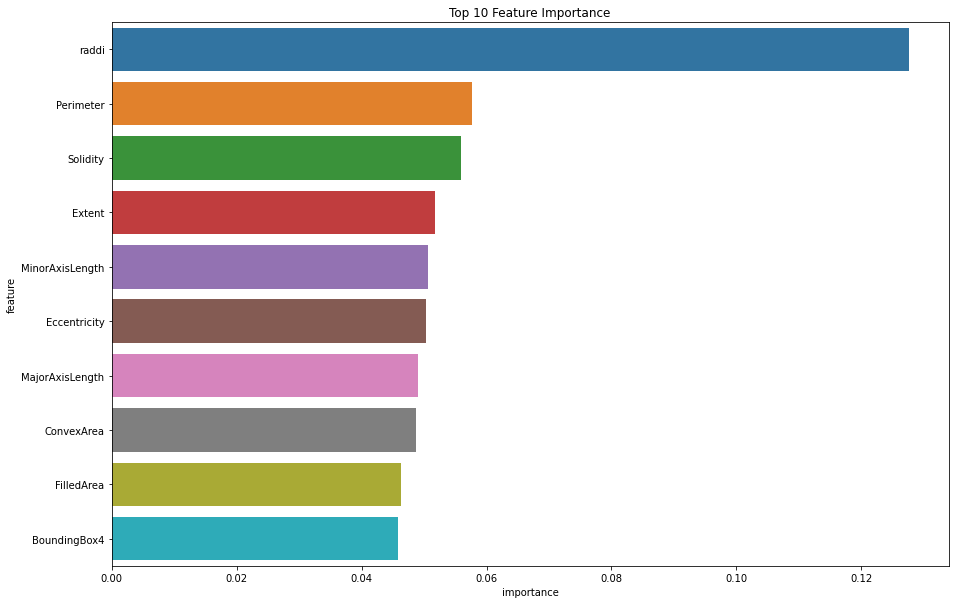

In [42]:
plt.figure(figsize=(15,10))
plt.title('Top 10 Feature Importance')
sns.barplot(data=importance_df_rf.head(10), x='importance', y='feature');

## XGBOOST Classifier

In [43]:
xgb_clf = XGBClassifier(random_state=42)

In [44]:
#Label Encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train.unique())

y_train_enc = le.transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

In [45]:
xgb_clf.fit(X_train, y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [46]:
model_scores(xgb_clf, X_train,y_train_enc, X_val, y_val_enc, train=True)

========== Train Classification Report ============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00      1392
           2       1.00      1.00      1.00       827
           3       1.00      1.00      1.00      1056
           4       1.00      1.00      1.00      2977
           5       1.00      1.00      1.00      1944
           6       1.00      1.00      1.00       468
           7       1.00      1.00      1.00      5674
           8       1.00      1.00      1.00      3309
           9       1.00      1.00      1.00      2736

    accuracy                           1.00     23352
   macro avg       1.00      1.00      1.00     23352
weighted avg       1.00      1.00      1.00     23352


 Accuracy Score :  0.999914354230901


In [47]:
model_scores(xgb_clf, X_train,y_train_enc, X_val, y_val_enc, train=False)

========== Validation Classification Report ============
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       591
           1       0.99      1.00      0.99       281
           2       1.00      1.00      1.00       161
           3       0.99      0.98      0.99       169
           4       1.00      1.00      1.00       551
           5       1.00      1.00      1.00       391
           6       1.00      0.77      0.87        96
           7       0.98      0.99      0.99      1113
           8       1.00      1.00      1.00       671
           9       0.99      1.00      1.00       556

    accuracy                           0.99      4580
   macro avg       0.99      0.97      0.98      4580
weighted avg       0.99      0.99      0.99      4580


 Accuracy Score :  0.9903930131004367


### Models Accuracy on Test Data

In [48]:
print('--------- Model Unseen Data Accuracy Score ----------\n')

print('DTC1 Accuracy : ',accuracy_score(y_test,dtc1.predict(X_test)))
print('RFC Accuracy :  ',accuracy_score(y_test,rfc.predict(X_test)))
print('XGB Accuracy : ',accuracy_score(y_test_enc,xgb_clf.predict(X_test)))

--------- Model Unseen Data Accuracy Score ----------

DTC1 Accuracy :  0.9865125240847784
RFC Accuracy :   0.9884393063583815
XGB Accuracy :  0.9922928709055877


## Feature Selection 

Here We will try to obtain maximum accuracy with least number of features for XGB_Classifier.

In [49]:
importance_df_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df_xgb.head(10)

,feature,importance
19,ConvexArea,0.148792
23,raddi,0.096812
4,FilledArea,0.066105
17,MinorAxisLength,0.053937
18,Perimeter,0.051431
0,Solidity,0.049385
22,Area,0.045187
1,Eccentricity,0.044295
16,MajorAxisLength,0.042846
2,EquivDiameter,0.041728


In [50]:
# Slecting features Manually with Looping
scores = {'Features':[],'Val Accuracy':[]}
for i in range(1,25):
    xgb_clf_fsel = XGBClassifier(random_state=42)
    xgb_clf_fsel.fit(X_train[importance_df_xgb.iloc[:i,0].values],y_train_enc)
    y_hat = xgb_clf_fsel.predict(X_val[importance_df_xgb.iloc[:i,0].values])
    scores['Features'].append(i)
    scores['Val Accuracy'].append(accuracy_score(y_val_enc,y_hat))

In [51]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.set_index('Features')

Text(0.5, 1.0, 'Models Accuracy with Features')

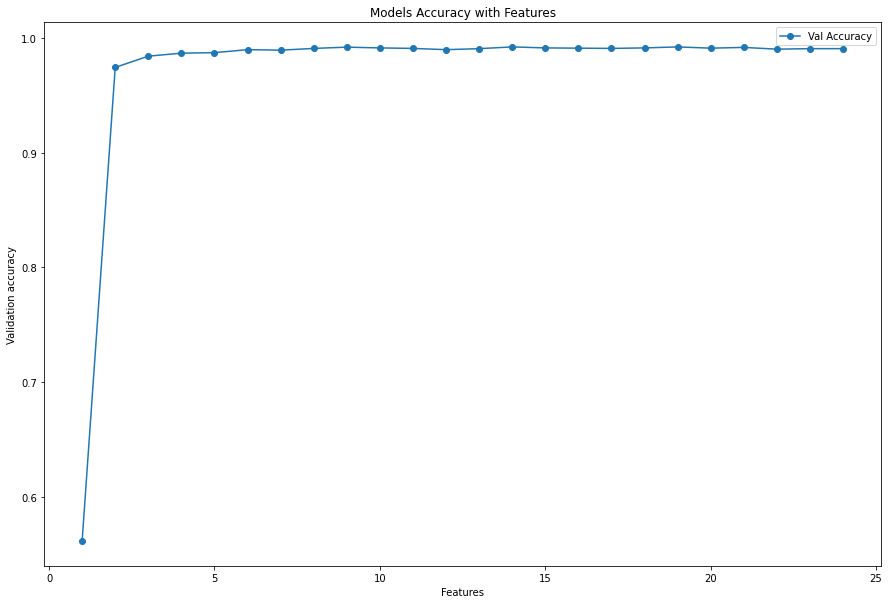

In [52]:
scores_df.plot(figsize=(15,10),marker='o');
plt.ylabel('Validation accuracy')
plt.title('Models Accuracy with Features')

From  Plot we see that with `top 6 features` we are able to classifiy target with an `accuracy of 0.99`

### Top 6 Features

In [53]:
top_6_feats = importance_df_xgb.iloc[:6,0].values
top_6_feats

array(['ConvexArea', 'raddi', 'FilledArea', 'MinorAxisLength',
       'Perimeter', 'Solidity'], dtype=object)

### Training XGB with Top 6 Features only

In [54]:
xgb_clf_top6 = XGBClassifier(random_state=42)
xgb_clf_top6.fit(X_train[top_6_feats], y_train_enc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [55]:
model_scores(xgb_clf_top6, X_train[top_6_feats],y_train_enc, X_val[top_6_feats], y_val_enc, train=False)

========== Validation Classification Report ============
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       591
           1       0.98      1.00      0.99       281
           2       1.00      1.00      1.00       161
           3       0.99      0.95      0.97       169
           4       0.99      1.00      1.00       551
           5       1.00      1.00      1.00       391
           6       1.00      0.84      0.92        96
           7       0.98      0.99      0.99      1113
           8       0.99      1.00      1.00       671
           9       0.99      1.00      0.99       556

    accuracy                           0.99      4580
   macro avg       0.99      0.98      0.98      4580
weighted avg       0.99      0.99      0.99      4580


 Accuracy Score :  0.9899563318777292


In [56]:
print('XGB test accuracy with top 6 features : ',accuracy_score(y_test_enc,xgb_clf_top6.predict(X_test[top_6_feats])))

XGB test accuracy with top 6 features :  0.991907514450867


### Saving Model

In [57]:
import joblib

In [58]:
model_xgb = {'xgb_clf':xgb_clf_top6,
             'Selected_Features':top_6_feats,
            'label_encoder':le}
joblib.dump(model_xgb,'xgb_clf.joblib')

['xgb_clf.joblib']

### Saving Test Data to CSV

In [59]:
test_df = X_test[top_6_feats]
test_df['Microorganism'] = y_test

In [63]:
test_df.to_csv('test_data.csv',index=None)

### <a href='https://omjiverma-microbes-identi-microbes-identification-webapp-xtpreg.streamlitapp.com/'>Link to Webapp </a>